In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#One-dimensional-systems" data-toc-modified-id="One-dimensional-systems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>One dimensional systems</a></span><ul class="toc-item"><li><span><a href="#Simple-plotting-to-find-fixed-points" data-toc-modified-id="Simple-plotting-to-find-fixed-points-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple plotting to find fixed points</a></span></li><li><span><a href="#Actually-solving-the-ODE-to-find-fixed-points" data-toc-modified-id="Actually-solving-the-ODE-to-find-fixed-points-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Actually solving the ODE to find fixed points</a></span><ul class="toc-item"><li><span><a href="#Obtaining-an-analytic-solution" data-toc-modified-id="Obtaining-an-analytic-solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Obtaining an analytic solution</a></span></li><li><span><a href="#Numeric-integration-to-find-trajectories" data-toc-modified-id="Numeric-integration-to-find-trajectories-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Numeric integration to find trajectories</a></span></li></ul></li><li><span><a href="#Dependence-on-parameters" data-toc-modified-id="Dependence-on-parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dependence on parameters</a></span></li></ul></li><li><span><a href="#Two-dimensional-systems" data-toc-modified-id="Two-dimensional-systems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two dimensional systems</a></span><ul class="toc-item"><li><span><a href="#Nullclines" data-toc-modified-id="Nullclines-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Nullclines</a></span></li></ul></li></ul></div>

## One dimensional systems

Such systems are characterized by equations of the form
<br>
$
\dot{x} = f(x)
$
<br>
As an example, I'll use the equation $\dot{x} = rx-x^3$ for all analyses below

In [158]:
def xdot(x,t,r):
    return r*x - x**3
    

### Simple plotting to find fixed points

To start with, we can plot $\dot{x}$ vs $x$. The points at which this curve intersects the x-axis represent _fixed points_, i.e points where $\dot{x} = 0$. A system starting at a fixed point never leaves it. Further, every trajectory in a one dimensional system either approaches a fixed point or diverges to infinity.

In [180]:
def xdot_vs_x(rlist):
    for r in np.arange(rlist[0],rlist[1],rlist[2]):
        x = np.arange(-10,10,0.01)
        xdotlist = []
        for val in x:
            xdotlist.append(xdot(val,0,r))
        
        plt.plot(x,xdotlist,label='r = '+str(r))
    plt.axhline(y=0,color='g',linestyle='--')
    plt.axvline(x=0,color='g',linestyle='--')
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('x dot')
    plt.xlim([-5,5])
    plt.ylim([-10,10])
    plt.show()

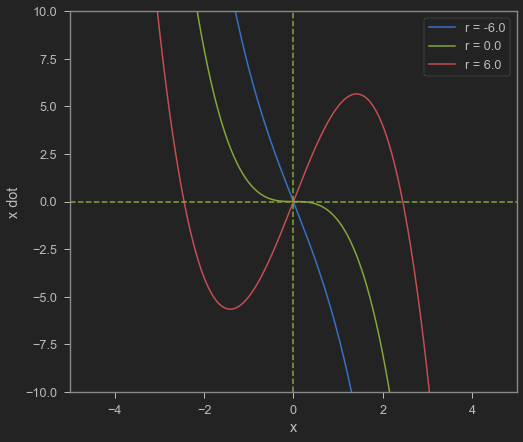

In [181]:
xdot_vs_x([-6,6.1,6])

As we can see, this system appears to show three fixed points for r > 0, and a single fixed point at x = 0 for r $\leq$ 0.

### Actually solving the ODE to find fixed points


#### Obtaining an analytic solution

This can also be seen by actually solving the differential equation. I will use sympy to analytically solve the differential equation

In [68]:
#Solving the given ODE symbolically
n,r = symbols('n r')
init_printing()
n_dot = r*n - n**3

solve(n_dot,n)

#### Numeric integration to find trajectories

Since solving ODEs analytically is not always feasible, we could also use numerical integration to obtain the *trajectory*, i.e the values of $x(t)$ as $t$ varies, given an initial value $x_0$. Here, I use the *odeint* package from scipy.

In [178]:
def trajectory(rlist,x0,t=10,tstep=0.01):
    xlist = np.arange(0,t,tstep)
    for r in rlist:
        ylist = odeint(func=xdot,y0=[x0],t=np.arange(0,t,tstep),args=tuple([r]))
        plt.plot(xlist,ylist,label='r = '+str(r))
    
    plt.legend(loc='upper right')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.show()

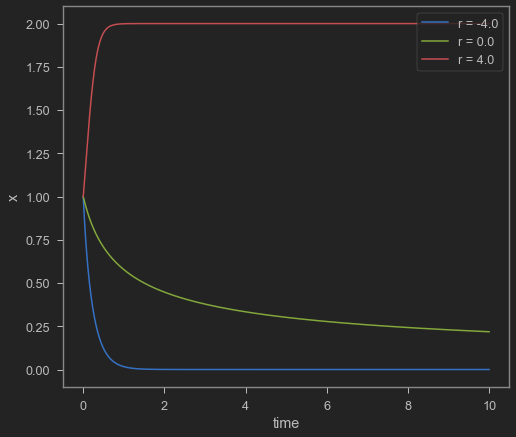

In [179]:
trajectory(np.arange(-4,4.1,4),1)

### Dependence on parameters

Finally, we can examine how the number of fixed points varies as we vary parameters. In our case, the system has a single parameter: $r$. <br>
<br>
We examine the relationship between fixed points and parameter values by plotting a *bifurcation diagram*. In this case, we plot $r$ against the corresponding equilibrium values of $x$, for various initial values $x(0)$.

In [176]:
def bifurcation(r_range):
    rvals = np.arange(r_range[0],r_range[1],r_range[2])
    eq_list = []
    r_list = []
    for r in rvals:
        for x in np.arange(-10,10.1,5):
            unique_sols = np.unique(odeint(func=xdot,y0=[x],t=np.arange(0,1000,1),args=tuple([r]))[900:1000])
            for sol in unique_sols:
                eq_list.append(sol)
                r_list.append(r)
    
    plt.scatter(r_list,eq_list,color='g',s=2)
    plt.xlabel('r')
    plt.ylabel('x*')
    plt.show()
        

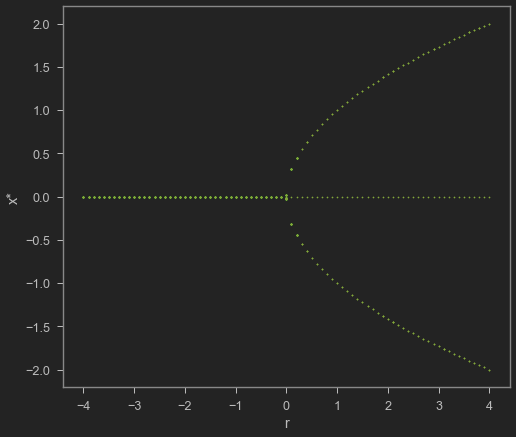

In [177]:
bifurcation([-4,4.1,0.1])

This diagram tells us that when r is less than 0, there is a single fixed point present at x = 0. At r = 0, the behaviour changes, and two new fixed points appear for all values of r > 0. Values of $r$ at which such changes occur are known as *bifurcation points*.

## Two dimensional systems

Two dimensional systems are systems of the form:

$
\begin{align*}
\dot{x} = f(x,y) \\
\dot{y} = g(x,y)
\end{align*}
$
<br>

As before, we can begin by plotting the phase portrait. Here, the phase portrait is two-dimensional, and you can think of $f(x,y)$ and $g(x,y)$ as representing the flow on a plane.

In [9]:
def twoD_phase_portrait(var,var_dot,xlims=[-10,10,40],ylims=[-10,10,40],plot_nullclines=True,save=False,filename='2D_portrait.png'):    
    
    #convert the symbolic math into a python function
    dvar = lambdify(var,var_dot,'numpy')
    
    #The range of values in which you want the phase portrait
    x_in = np.linspace(xlims[0],xlims[1],xlims[2])
    y_in = np.linspace(ylims[0],ylims[1],ylims[2])
        
    X_in, Y_in = np.meshgrid(x_in,y_in)
    
    #Compute and store the derivatives at each point
    u,v = np.zeros(X_in.shape), np.zeros(Y_in.shape)
    shape_1, shape_2 = X_in.shape
    for i in range(shape_1):
        for j in range(shape_2):
            pt_x = X_in[i,j]
            pt_y = Y_in[i,j]
            derivative = dvar(pt_x,pt_y)
            u[i,j] = derivative[0]
            v[i,j] = derivative[1]
    
    colors = np.hypot(u,v)
    colors[colors==0] = 1 #To avoid division by 0
    
    #Normalize arrow lengths
    #u /= colors
    #v /= colors
    
    
    plt.figure(figsize=(8,8))
    plt.quiver(X_in,Y_in,u,v,colors,cmap='viridis',pivot='mid')
    
    if plot_nullclines:
        #Compute and plot the nullclines
        x_nullcline = solve(var_dot[0])
        y_nullcline = solve(var_dot[1])
    
        xnull_label = "x nullcline"
        for sol in range(len(x_nullcline)):
            try:
                null_func = lambdify(var[1],x_nullcline[sol][x],'numpy')
                null = []
                for i in range(len(y_in)):
                    null.append(null_func(y_in[i]))
                plt.plot(null,y_in,'b',label=xnull_label)
                xnull_label = '_nolegend_' #To avoid duplicate labels
            except KeyError:
                null_func = lambdify(var[0],y_nullcline[sol][y],'numpy')
                null = []
                for i in range(len(x_in)):
                    null.append(null_func(x_in[i]))
                plt.plot(x_in,null,'b',label=xnull_label)
                xnull_label = '_nolegend_' #To avoid duplicate labels
    
        ynull_label = 'y nullcline'
        for sol in range(len(y_nullcline)):
            try:
                null_func = lambdify(var[1],y_nullcline[sol][x],'numpy')
                null = []
                for i in range(len(y_in)):
                    null.append(null_func(y_in[i]))
                plt.plot(null,y_in,'r',label=ynull_label)
                ynull_label = '_nolegend_' #To avoid duplicate labels
            except KeyError:
                null_func = lambdify(var[0],y_nullcline[sol][y],'numpy')
                null = []
                for i in range(len(x_in)):
                    null.append(null_func(x_in[i]))
                plt.plot(x_in,null,'r',label=ynull_label)
                ynull_label = '_nolegend_' #To avoid duplicate labels
    
    plt.xlabel(str(var[0]))
    plt.ylabel(str(var[1]))
    plt.xlim(xlims[0:2])
    plt.ylim(ylims[0:2])
    plt.colorbar(label="Derivative")
    
    if plot_nullclines:
        plt.legend(bbox_to_anchor=[1.3,1])
    if save:
        plt.savefig(filename)
    

In [23]:
x,y = symbols('x y')

init_printing()

In [24]:
#write the differential equations here
x_dot, y_dot = cos(x-y), sin(x*y+1)

x_dot, y_dot

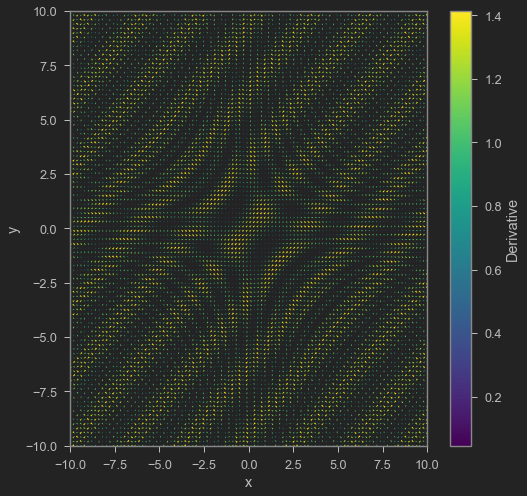

In [16]:
twoD_phase_portrait([x,y],[x_dot,y_dot],xlims=[-10,10,100],ylims=[-10,10,100],plot_nullclines=False)

### Nullclines

One useful notion is that of a *nullcline*. Nullclines are defined as the curves where either $\dot{x} = 0$ or $\dot{y} = 0$. Fixed points are points at which nullclines intersect.

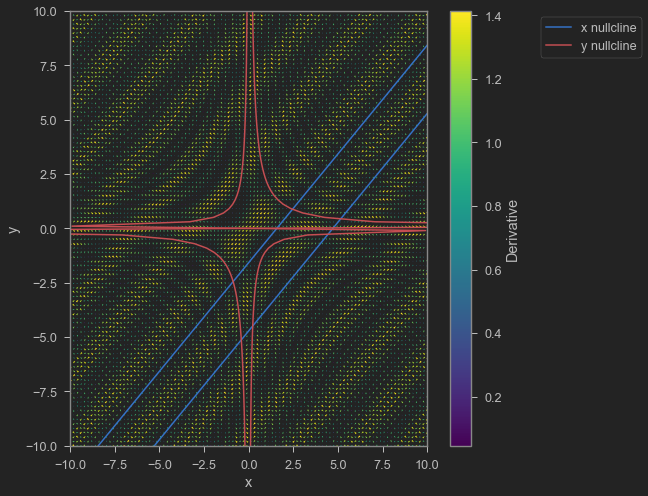

In [25]:
twoD_phase_portrait([x,y],[x_dot,y_dot],xlims=[-10,10,100],ylims=[-10,10,100])

In [26]:
#Number of fixed points should equal the number of times the nullclines intersect
fixed_points = solve([x_dot,y_dot],[x,y])
len(fixed_points)